## Question 1

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization,Dropout
from tensorflow.keras import optimizers

In [2]:
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()

In [3]:
Y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

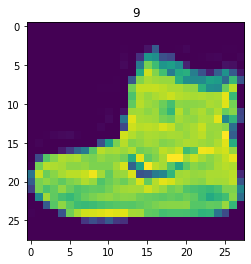

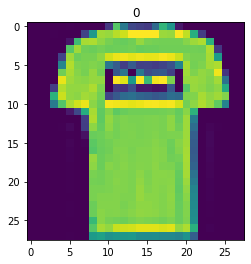

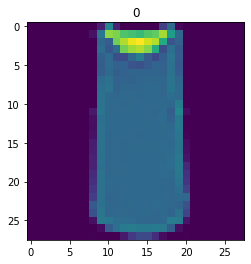

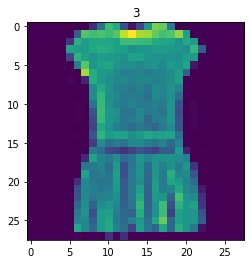

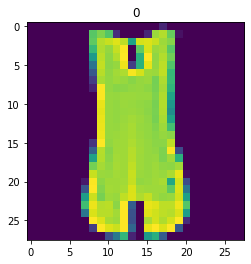

In [4]:
for i in range(5):
    plt.imshow(X_train[i])
    plt.title(Y_train[i])
    plt.show()

## Printing the shape

In [5]:
print(X_train[0].shape)
print(X_train.shape)

(28, 28)
(60000, 28, 28)


In [6]:
X_train=X_train.reshape(X_train.shape[0],-1)

In [7]:
X_test=X_test.reshape(X_test.shape[0],-1)

## One hot encoding

In [8]:
Y_train=to_categorical(Y_train)
Y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
Y_test=to_categorical(Y_test)
Y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(60000, 784) (10000, 784) (60000, 10) (10000, 10)


## Question 2

In [11]:
def f_model():
    model=Sequential()
    model.add(Dense(50, input_shape = (784,)))
    model.add(Activation('sigmoid'))
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    ad = optimizers.SGD(learning_rate = 0.001)
    model.compile(optimizer = ad, loss = "categorical_crossentropy", metrics = ['accuracy'])
    return model

In [12]:
model1=f_model()

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_1 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
activation_2 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2

In [14]:
train1=model1.fit(X_train,Y_train,validation_split=0.3,epochs=5,verbose=1)

Epoch 1/5
1313/1313 [==============================] - 12s 7ms/step - loss: 2.3514 - accuracy: 0.0987 - val_loss: 2.3069 - val_accuracy: 0.0950
Epoch 2/5
1313/1313 [==============================] - 11s 8ms/step - loss: 2.3033 - accuracy: 0.1020 - val_loss: 2.3022 - val_accuracy: 0.0977
Epoch 3/5
1313/1313 [==============================] - 9s 7ms/step - loss: 2.3020 - accuracy: 0.1114 - val_loss: 2.3020 - val_accuracy: 0.0976
Epoch 4/5
1313/1313 [==============================] - 11s 8ms/step - loss: 2.3019 - accuracy: 0.1128 - val_loss: 2.3020 - val_accuracy: 0.1475
Epoch 5/5
1313/1313 [==============================] - 11s 8ms/step - loss: 2.3017 - accuracy: 0.1224 - val_loss: 2.3018 - val_accuracy: 0.0976


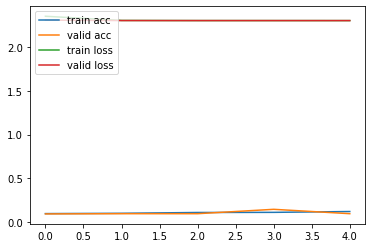

In [15]:
plt.plot(train1.history['accuracy' ])
plt.plot(train1.history['val_accuracy'])
plt.plot(train1.history['loss'])
plt.plot(train1.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

In [16]:
model_out1=model1.evaluate(X_test,Y_test)
print(f"Test Accuracy is: {model_out1[1]*100}%")

313/313 [==============================] - 2s 6ms/step - loss: 2.3016 - accuracy: 0.1009
Test Accuracy is: 10.090000182390213%


In [17]:
print(model1.metrics_names) 
print(model_out1)

['loss', 'accuracy']
[2.3016247749328613, 0.10090000182390213]


In [18]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=model1.predict(X_test)


In [19]:
y_pred

array([[0.09942036, 0.0995857 , 0.09764991, ..., 0.10090905, 0.10053688,
        0.10061118],
       [0.09930851, 0.09988195, 0.09771084, ..., 0.10047585, 0.10067293,
        0.10025135],
       [0.09965917, 0.09993375, 0.09735108, ..., 0.10056111, 0.1004992 ,
        0.10065679],
       ...,
       [0.09942184, 0.09959981, 0.09775609, ..., 0.100796  , 0.10065637,
        0.10046329],
       [0.09948202, 0.0999712 , 0.09744152, ..., 0.10052709, 0.10052226,
        0.10048761],
       [0.09943772, 0.09985387, 0.09762271, ..., 0.10081539, 0.10041373,
        0.10048223]], dtype=float32)

In [20]:
y_pred1=np.argmax(y_pred,axis=1)

In [21]:
Y_test1=np.argmax(Y_test,axis=1)

In [22]:
matrix1 = confusion_matrix(Y_test1, y_pred1)
print(matrix1)
print(classification_report(Y_test1,y_pred1))

[[   0    0    0    0    0    0 1000    0    0    0]
 [   0    0    0    0    0    0 1000    0    0    0]
 [   0    0    0    0    0    0 1000    0    0    0]
 [   0    0    0    0    0    0 1000    0    0    0]
 [   0    0    0    0    0    0 1000    0    0    0]
 [   0    0    0    0    0    0  997    3    0    0]
 [   0    0    0    0    0    0 1000    0    0    0]
 [   0    0    0    0    0    0  991    9    0    0]
 [   0    0    0    0    0    0 1000    0    0    0]
 [   0    0    0    0    0    0  997    3    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.10      1.00      0.18      1000
           7       0.60      0.01   

C:\Users\Surya\anaconda3\envs\tf_2.7\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Surya\anaconda3\envs\tf_2.7\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Surya\anaconda3\envs\tf_2.7\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
import seaborn as sns

In [24]:
def matrix(cm):
    fig, ax = plt.subplots(figsize=(10,10))       
    sns.set(font_scale=1)
    sns.heatmap(cm, annot=True, ax=ax)

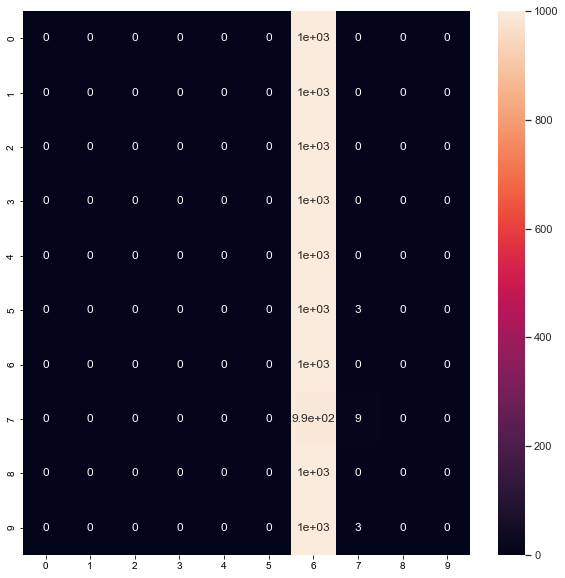

In [25]:
matrix(matrix1)

### The model is slightly overfitted as train accuracy > val accuracy

## Question 3

In [26]:
def f1_model(initializer='he_normal'):
    model=Sequential()
    model.add(Dense(50, input_shape = (784,),kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50,kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50,kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50,kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50,kernel_initializer=initializer))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(10,kernel_initializer=initializer))
    model.add(Activation('softmax'))

    ad = optimizers.Adam(learning_rate = 0.001)
    model.compile(optimizer = ad, loss = "categorical_crossentropy", metrics = ['accuracy'])
    return model

In [27]:
model2=f1_model()

In [28]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                39250     
_________________________________________________________________
batch_normalization (BatchNo (None, 50)                200       
_________________________________________________________________
activation_6 (Activation)    (None, 50)                0         
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
activation_7 (Activation)    (None, 50)               

In [29]:
from tensorflow.keras.callbacks import Callback

## Custom callback function

In [30]:
class TerminateOnBaseline(Callback):
    def __init__(self, monitor='accuracy', baseline=0.9):
        super(TerminateOnBaseline, self).__init__()
        self.monitor = monitor
        self.baseline = baseline

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        acc = logs.get(self.monitor)
        if acc is not None:
            if acc >= self.baseline:
                print('Epoch %d: Reached baseline, terminating training' % (epoch))
                self.model.stop_training = True

In [31]:
callback = [TerminateOnBaseline()]

In [32]:
train2=model2.fit(X_train,Y_train,validation_split=0.3,epochs=5,callbacks=[callback],verbose=1)

Epoch 1/5
1313/1313 [==============================] - 28s 20ms/step - loss: 1.4000 - accuracy: 0.5077 - val_loss: 0.6586 - val_accuracy: 0.7863
Epoch 2/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.8706 - accuracy: 0.7059 - val_loss: 0.5309 - val_accuracy: 0.8157
Epoch 3/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.7582 - accuracy: 0.7489 - val_loss: 0.5165 - val_accuracy: 0.8219
Epoch 4/5
1313/1313 [==============================] - 25s 19ms/step - loss: 0.7028 - accuracy: 0.7709 - val_loss: 0.4686 - val_accuracy: 0.8391
Epoch 5/5
1313/1313 [==============================] - 23s 17ms/step - loss: 0.6745 - accuracy: 0.7785 - val_loss: 0.4591 - val_accuracy: 0.8433


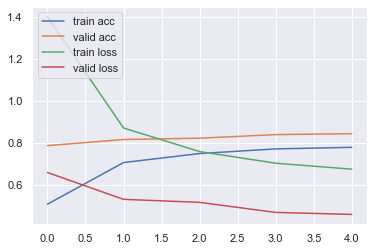

In [33]:
plt.plot(train2.history['accuracy' ])
plt.plot(train2.history['val_accuracy'])
plt.plot(train2.history['loss'])
plt.plot(train2.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc = 'upper left')
plt.show()

In [34]:
model_out2=model2.evaluate(X_test,Y_test)
print(f"Test Accuracy is: {model_out2[1]*100}%")

313/313 [==============================] - 2s 5ms/step - loss: 0.4890 - accuracy: 0.8306
Test Accuracy is: 83.06000232696533%


In [35]:
print(model2.metrics_names) 
print(model_out2)

['loss', 'accuracy']
[0.48901939392089844, 0.8306000232696533]


In [36]:
Y_pred=model2.predict(X_test)

In [37]:
Y_pred1=np.argmax(Y_pred,axis=1)

In [38]:
Y_test2=np.argmax(Y_test,axis=1)

In [39]:
matrix2 = confusion_matrix(Y_test2, Y_pred1)
print(matrix2)
print(classification_report(Y_test2,Y_pred1))

[[846   2   6  51   3   1  75   0  16   0]
 [  1 951   4  35   7   0   0   0   2   0]
 [ 30   0 702  11 170   2  67   0  18   0]
 [ 38   9   2 871  35   1  36   1   7   0]
 [  1   2 111  31 769   2  75   0   9   0]
 [  1   0   0   0   0 887   1  77   9  25]
 [241   1 123  39 111   1 459   1  24   0]
 [  0   0   0   0   0  22   0 962   0  16]
 [  2   1   1   3   2   6  13   5 967   0]
 [  0   0   0   0   0  21   0  85   2 892]]
              precision    recall  f1-score   support

           0       0.73      0.85      0.78      1000
           1       0.98      0.95      0.97      1000
           2       0.74      0.70      0.72      1000
           3       0.84      0.87      0.85      1000
           4       0.70      0.77      0.73      1000
           5       0.94      0.89      0.91      1000
           6       0.63      0.46      0.53      1000
           7       0.85      0.96      0.90      1000
           8       0.92      0.97      0.94      1000
           9       0.96     

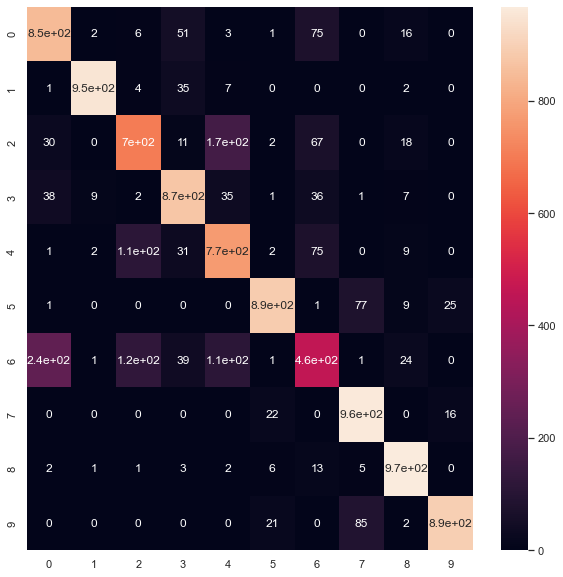

In [40]:
matrix(matrix2)

### The train accuracy is greater than val accuracy so the model is overfitted

## Ensemble Learning

In [41]:
y_train4=np.argmax(Y_train,axis=1)
y_test4=np.argmax(Y_test,axis=1)

In [42]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [43]:
callback1 = [TerminateOnBaseline()]

In [44]:
emodel1=KerasClassifier(build_fn=f1_model,epochs=5,validation_split=0.3,callbacks=[callback1],verbose=1)
emodel2=KerasClassifier(build_fn=f1_model,epochs=5,validation_split=0.3,callbacks=[callback1],verbose=1)
emodel1._estimator_type="classifier"
emodel2._estimator_type="classifier"

In [45]:
ensemble=VotingClassifier(estimators=[('model1',emodel1),('model2',emodel2)],voting='soft')

In [46]:
etrain=ensemble.fit(X_train,y_train4)

Epoch 1/5
1313/1313 [==============================] - 26s 19ms/step - loss: 1.4439 - accuracy: 0.5026 - val_loss: 0.6311 - val_accuracy: 0.7876
Epoch 2/5
1313/1313 [==============================] - 22s 17ms/step - loss: 0.8569 - accuracy: 0.7128 - val_loss: 0.5375 - val_accuracy: 0.8092
Epoch 3/5
1313/1313 [==============================] - 22s 17ms/step - loss: 0.7382 - accuracy: 0.7565 - val_loss: 0.5136 - val_accuracy: 0.8198
Epoch 4/5
1313/1313 [==============================] - 22s 17ms/step - loss: 0.6926 - accuracy: 0.7724 - val_loss: 0.4778 - val_accuracy: 0.8301
Epoch 5/5
1313/1313 [==============================] - 22s 17ms/step - loss: 0.6604 - accuracy: 0.7840 - val_loss: 0.4574 - val_accuracy: 0.8432
Epoch 1/5
1313/1313 [==============================] - 24s 17ms/step - loss: 1.4156 - accuracy: 0.5065 - val_loss: 0.6669 - val_accuracy: 0.7850
Epoch 2/5
1313/1313 [==============================] - 22s 17ms/step - loss: 0.8740 - accuracy: 0.7050 - val_loss: 0.5442 - val_ac

In [47]:
y1_pred = ensemble.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [48]:
x=accuracy_score(y_test4,y1_pred)

In [49]:
print("Test Accuracy is :", x*100 ," %")

Test Accuracy is : 83.41  %


In [52]:
matrix5 = confusion_matrix(y_test4, y1_pred)
print(matrix1)
print(classification_report(y_test4,y1_pred))

[[790   5  14  60   3   2 114   0  12   0]
 [  1 964   5  24   4   0   1   0   1   0]
 [ 17   4 729  10 162   0  73   1   4   0]
 [ 27  21   5 856  37   1  49   0   4   0]
 [  0   2 114  24 793   2  61   0   4   0]
 [  0   0   0   1   0 884   1  73   5  36]
 [159   1 141  51 129   1 500   1  17   0]
 [  0   0   0   0   0  22   0 940   1  37]
 [  1   2   4   4   6   9  22   5 947   0]
 [  0   0   0   0   0  14   0  47   1 938]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1000
           1       0.96      0.96      0.96      1000
           2       0.72      0.73      0.72      1000
           3       0.83      0.86      0.84      1000
           4       0.70      0.79      0.74      1000
           5       0.95      0.88      0.91      1000
           6       0.61      0.50      0.55      1000
           7       0.88      0.94      0.91      1000
           8       0.95      0.95      0.95      1000
           9       0.93     

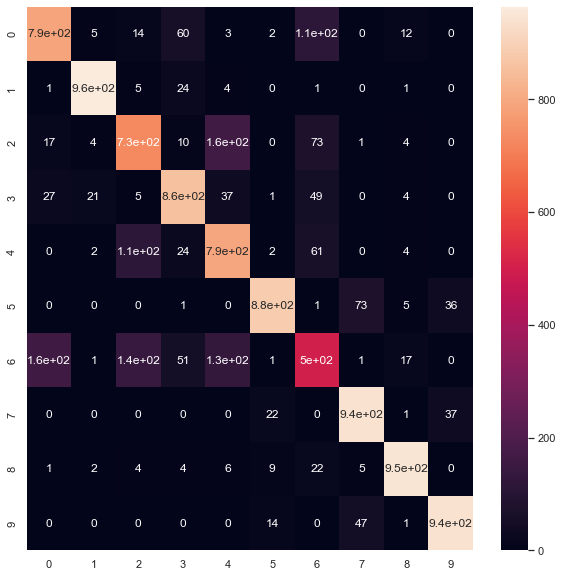

In [53]:
matrix(matrix5)